# Gradient Descent

Minimum occurs at -0.003135
Number of steps: 14


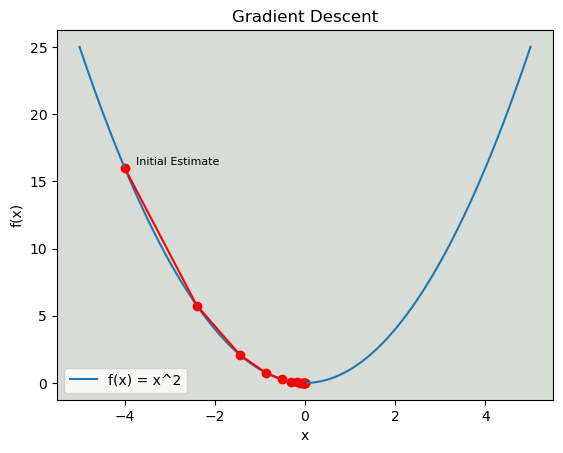

           x          y     df(x)
0  -4.000000  16.000000 -8.000000
1  -2.400000   5.760000 -4.800000
2  -1.440000   2.073600 -2.880000
3  -0.864000   0.746496 -1.728000
4  -0.518400   0.268739 -1.036800
5  -0.311040   0.096746 -0.622080
6  -0.186624   0.034829 -0.373248
7  -0.111974   0.012538 -0.223949
8  -0.067185   0.004514 -0.134369
9  -0.040311   0.001625 -0.080622
10 -0.024186   0.000585 -0.048373
11 -0.014512   0.000211 -0.029024
12 -0.008707   0.000076 -0.017414
13 -0.005224   0.000027 -0.010449
14 -0.003135   0.000010 -0.006269


In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def f(x):
    '''
    This function returns the value of x^2
    '''
    return x**2

def df(x):
    '''
    This function returns the value of the derivative of x^2 2x
    '''
    return 2*x

lr = 0.2 # Learning rate

max_iterations = 1000 # The number of iterations for gradient descent to run

convergence_criteria = 0.01 # Convergence criteria to stop gradient descent

x = -4 # Sets the initial value of x to -4. This enables demonstration of the effect of the learning rate

gradient_descent_df = pd.DataFrame(columns=['x', 'y', 'df(x)']) # dataframes to hold the values of x, y and df(x) for each iteration

for i in range(max_iterations):
    
    gradient_descent_df = pd.concat([gradient_descent_df, pd.DataFrame({'x': [x], 'y': [f(x)], 'df(x)': [df(x)]})], ignore_index=True) # Append values to the dataframe using concat

    gradient_descent_df = gradient_descent_df.astype(float) # update all values in data frame to float

    if abs(df(x)) < convergence_criteria: # Checks if the derivative is less than the convergence criteria
        print("Minimum occurs at %f" % x)
        print("Number of steps: %d" % i)
        break # Breaks out of the loop if the convergence criteria is met

    else: # If the convergence criteria is not met
        x = x - lr * df(x) # Updates the value of x to the next value in the gradient descent sequence
        continue # Continues to the next iteration of the loop
    
# Plots the function and values for each iteration of the gradient descent algorithm
x = np.linspace(-5,5,500) # 500 points between -5 and 5
y = f(x)
plt.plot(x,y, label='f(x) = x^2')

# Plot the gradient descent iterations as a scatter plot and connect them with a line in red
plt.plot(gradient_descent_df['x'], gradient_descent_df['y'], color='red')
plt.scatter(gradient_descent_df['x'], gradient_descent_df['y'], color='red')
plt.text(gradient_descent_df['x'][0]+0.25, gradient_descent_df['y'][0]+0.25, 'Initial Estimate', fontsize=8)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')
plt.legend()
plt.gca().set_facecolor('xkcd:light grey')
plt.show()

print(gradient_descent_df) # Print table of the derivatives descent iterations


# Newton's Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the function, its derivative, and its second derivative
def f(x):
    '''
    This function returns the value of x^4-6*x^2+4*x+2
    '''
    return x**4-6*x**2+4*x+2

def df(x):
    '''
    This function returns the derivative of x^4-6*x^2+4*x+2
    '''
    return 4*x**3-12*x+4

def ddf(x):
    '''
    This function returns the second derivative of x^4-6*x^2+4*x+2
    '''
    return 12*x**2-12

x = -3.8 # # Sets the initial value of x to -3.8. This enables demonstration of the effect of the learning rate

convergence_criteria = 0.01 # Convergence criteria to stop iteration

newtons_method_df = pd.DataFrame(columns=['x', 'f(x)', 'df(x)', 'dd_f(x)']) # Creates ataframe to hold values of x, f(x), df(x) and dd_f(x) for each iteration

for i in range(100):
    # Append values to the dataframe using concat
    newtons_method_df = pd.concat([newtons_method_df, pd.DataFrame({'x': [x], 'f(x)': [f(x)], 'df(x)': [df(x)], 'dd_f(x)': [ddf(x)]})], ignore_index=True)
    
    newtons_method_df = newtons_method_df.astype(float) # update all values in data frame to float

    if abs(df(x)) < convergence_criteria: # Checks if the derivative is less than the convergence criteria
        break # Breaks out of the loop if the convergence criteria is met
    else:
        x = x - df(x) / ddf(x) # Updates the value of x to the next value in the gradient descent sequence
        continue # Continues to the next iteration of the loop

# Plot the function and values for each iteration of the Newton's method algorithm
x = np.linspace(-4, 4, 500) # 500 points between -4 and 4
y = f(x)
plt.plot(x, y, label="f(x) = x**4-6*x**2+4*x+2")

# Plot the Newton's method iterations as a scatter plot and connect them with a line in red
plt.plot(newtons_method_df['x'], newtons_method_df['f(x)'], color='red')
plt.scatter(newtons_method_df['x'], newtons_method_df['f(x)'], color='red')

# Plot the tangent line at each point in the Newton's method iterations
for i in range(len(newtons_method_df['x'])): 
    x_tangent = np.linspace(newtons_method_df['x'][i] - 0.25, newtons_method_df['x'][i] + 0.25, 1000)
    y_tangent = f(newtons_method_df['x'][i]) + df(newtons_method_df['x'][i]) * (x_tangent - newtons_method_df['x'][i])
    plt.plot(x_tangent, y_tangent, 'g--', linewidth=1.5)

plt.text(newtons_method_df['x'][0]+0.15, newtons_method_df['f(x)'][0]+0.15, 'Initial Guess', fontsize=8) # Plot the initial guess
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Newton's Method")
plt.gca().set_facecolor('xkcd:light grey') # change plot area to grey
plt.show()

# print table of the d
print(newtons_method_df)
